# Assignment 2 - Transforms, Homogeneous Notation and Projection

In [63]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [64]:
# Enable autoreloading if import packages are changed
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
# Set up python path 
import sys
import os
import cv2
import numpy as np 
import torch 
import math 
from math import sin, cos
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [66]:
# Projection operator
def pi(x): 
    dim = x.shape[0]
    x /= x[dim-1]
    return x[0:-1]

# Unprojection operator
def pi_inv(x): 
    dim = x.shape[0]
    x = np.concatenate((x, np.array([1,])), dtype=np.float32)
    return x 

# Returns a floating point numpy array 
def data(x):
    return np.array(x, dtype=np.float32)

# Multiplies a list of matrices together
def matmul(*x): 
    if len(x) == 1: return x 
    if len(x) == 2: return np.matmul(*x)
    result = np.matmul(x[0], x[1])
    for i in range(2, len(x)): 
        result = np.matmul(result, x[i])
    return result

In [67]:
import numpy as np

# Example point in non-homogeneous coordinates
non_homogeneous_point = np.array([2, 3], dtype=np.float32)

# Applying the Projection Operator (pi)
projected_point = pi(non_homogeneous_point)
print("Projected Point:", projected_point)

# Applying the Unprojection Operator (pi_inv)
unprojected_point = pi_inv(projected_point)
print("Unprojected Point:", unprojected_point)


Projected Point: [0.6666667]
Unprojected Point: [0.6666667 1.       ]


In [68]:
# Define data 
cube_vertices = [
    data([0, 0, 0, 1]),
    data([1, 0, 0, 1]),
    data([1, 0, 1, 1]),
    data([0, 0, 1, 1]),
    data([0, 1, 0, 1]),
    data([1, 1, 0, 1]),
    data([1, 1, 1, 1]),
    data([0, 1, 1, 1])
]

cube_lines = [
    (0, 1), 
    (1, 2),
    (2, 3), 
    (3, 0), 
    (4, 5), 
    (5, 6), 
    (6, 7), 
    (7, 4), 
    (0, 4), 
    (1, 5), 
    (2, 6), 
    (3, 7)
]

cube_colors = [
    data([0, 0, 0]),
    data([1, 0, 0]),
    data([1, 0, 1]),
    data([0, 0, 1]),
    data([0, 1, 0]),
    data([1, 1, 0]),
    data([0.5, 0.5, 0.5]),
    data([0, 1, 1])
]

def draw_cube(projected_vertices): 
    plt.gca().set_aspect('equal')
    
    # Draw lines 
    for line in cube_lines: 
        p1 = projected_vertices[line[0]]
        p2 = projected_vertices[line[1]]
        plt.plot((p1[0], p2[0]), (p1[1], p2[1]), '-', c='black', linewidth=0.5)            
        
    # Draw vertices
    for i, p in enumerate(projected_vertices): 
        plt.plot(p[0], p[1], 'o', c=cube_colors[i])        

## Q1: Place two cubes in the scene and render the scene from the top

[[0.5 0.  0.  0. ]
 [0.  1.2 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  1. ]]
[[ 0.86794538 -0.49240388 -0.0648787   1.        ]
 [ 0.46629002  0.85286853 -0.23492316  1.        ]
 [ 0.17101007  0.17364818  0.96984631  0.        ]
 [ 0.          0.          0.          1.        ]]
[array([0., 0., 0.], dtype=float32), array([0.5, 0. , 0. ], dtype=float32), array([0.5, 0. , 0.5], dtype=float32), array([0. , 0. , 0.5], dtype=float32), array([0. , 1.2, 0. ], dtype=float32), array([0.5, 1.2, 0. ], dtype=float32), array([0.5, 1.2, 0.5], dtype=float32), array([0. , 1.2, 0.5], dtype=float32)]
[array([1., 1., 0.]), array([1.86794538, 1.46629002, 0.17101007]), array([1.80306668, 1.23136686, 1.14085638]), array([0.9351213 , 0.76507684, 0.96984631]), array([0.50759612, 1.85286853, 0.17364818]), array([1.3755415 , 2.31915855, 0.34465825]), array([1.3106628 , 2.08423539, 1.31450456]), array([0.44271743, 1.61794538, 1.14349449])]


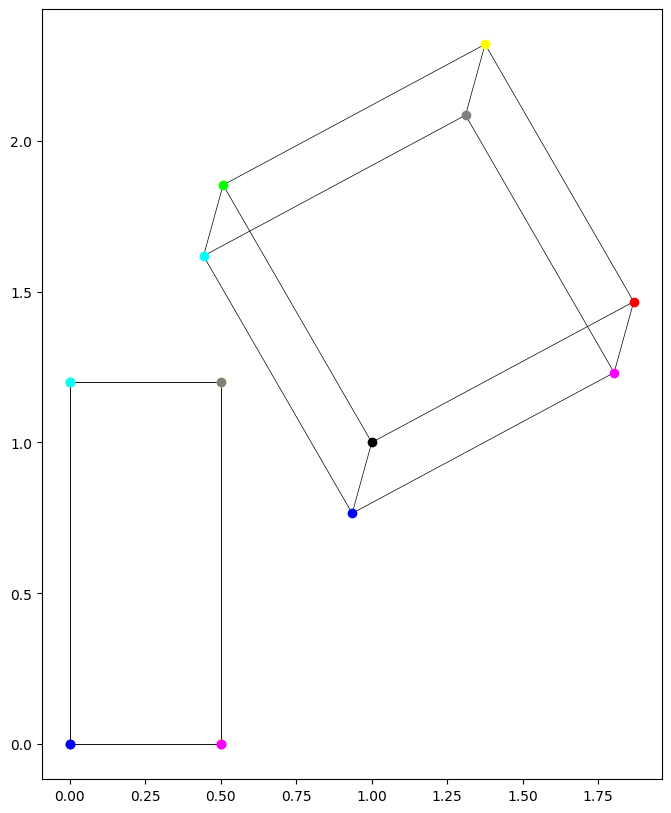

In [89]:
# Place cubes in the scene 

# --- First Cube 

# Scale the first cube by 50% in x-, 120% in y- and 50% in z direction
# Place it such that the object origin is at the world origin 

# Compute object-to-world transform for first cube
scale_factors = data([0.5, 1.2, 0.5, 1])
wC1o = np.diag(scale_factors)
# print(wC1o)

# --- Second Cube 

# Rotate the cube by 30deg around the z axis
# Rotate the cube by 10deg around the x axis
# Rotate the cube by 10deg around the y axis
# Move the cube coordinate system origin to world cooridnates (1, 1, 0)

# Compute object-to-world transform for second cube
rotation_angles = np.radians([30, 10, 10])

# Create rotation matrices for each axis
rotation_matrix_z = np.array([[np.cos(rotation_angles[0]), -np.sin(rotation_angles[0]), 0, 0],
                              [np.sin(rotation_angles[0]), np.cos(rotation_angles[0]), 0, 0],
                              [0, 0, 1, 0],
                              [0, 0, 0, 1]])

rotation_matrix_x = np.array([[1, 0, 0, 0],
                              [0, np.cos(rotation_angles[1]), -np.sin(rotation_angles[1]), 0],
                              [0, np.sin(rotation_angles[1]), np.cos(rotation_angles[1]), 0],
                              [0, 0, 0, 1]])
# rotation matrix from Discourse
rotation_matrix_y = np.array([[np.cos(rotation_angles[2]), 0, -np.sin(rotation_angles[2]), 0],
                              [0, 1, 0, 0],
                              [np.sin(rotation_angles[2]), 0, np.cos(rotation_angles[2]), 0],
                              [0, 0, 0, 1]])
# Combine rotation matrices into a single rotation matrix
rotation_matrix = matmul(rotation_matrix_z, rotation_matrix_x, rotation_matrix_y)
# print(rotation_matrix)

# Define translation vector
translation_vector = np.array([1, 1, 0, 1])


# Replace with the translation vector
rotation_matrix[:, 3] = translation_vector

# wC2o is now a 4x4 matrix
wC2o = rotation_matrix
print(wC1o)
print(wC2o)
# --- Draw scene from top looking orthographically at the x-y plane
C1_projected_vertices = [
     pi(np.matmul(wC1o, Xo)) for Xo in cube_vertices
]

C2_projected_vertices = [
     pi(np.matmul(wC2o, Xo)) for Xo in cube_vertices
]
print(C1_projected_vertices)
print(C2_projected_vertices)

f = plt.figure(figsize=(10, 10))
draw_cube(C1_projected_vertices)
draw_cube(C2_projected_vertices)


## Q2 Define calibration matrix K 

In [84]:
# Image width and height
w = 640
h = 480

# Focal length
f = 5
sx = w//2
sy = h//2
# Compute s, such that -1 to 1 from world coordinates fits into the height of the image
ox = 0
oy = 0


# Compute ox and oy
# Note: the top left pixel CENTER should be at 0,0 in sensor coordinates


K = matmul(data([data([sx, 0, ox]), data([0,sy , oy]), data([0,0,1])]), data([data([f, 0, 0]), data([0,f , 0]), data([0,0,1])]) )
# Set up 3x3 matrix K
#K = data([
#])
print(K)

[[1600.    0.    0.]
 [   0. 1200.    0.]
 [   0.    0.    1.]]


## Q3 Define first camera

[[ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0. -1.  0.  5.]
 [ 0.  0.  0.  1.]]
[[1600.    0.    0.]
 [   0. 1200.    0.]
 [   0.    0.    1.]]
[array([400.,   0.]), array([845.77189858,  58.07270174]), array([765.50478116, 363.26901761]), array([353.29899255, 274.81385844]), array([258.06160494,  66.21198235]), array([820.96104495, 154.27615041]), array([719.21460289, 540.99204969]), array([209.44306368, 405.72774202])]
[array([0., 0.]), array([160.,   0.]), array([160., 120.]), array([  0., 120.]), array([0., 0.]), array([210.52631843,   0.        ]), array([210.52631843, 157.89473882]), array([  0.        , 157.89473882])]


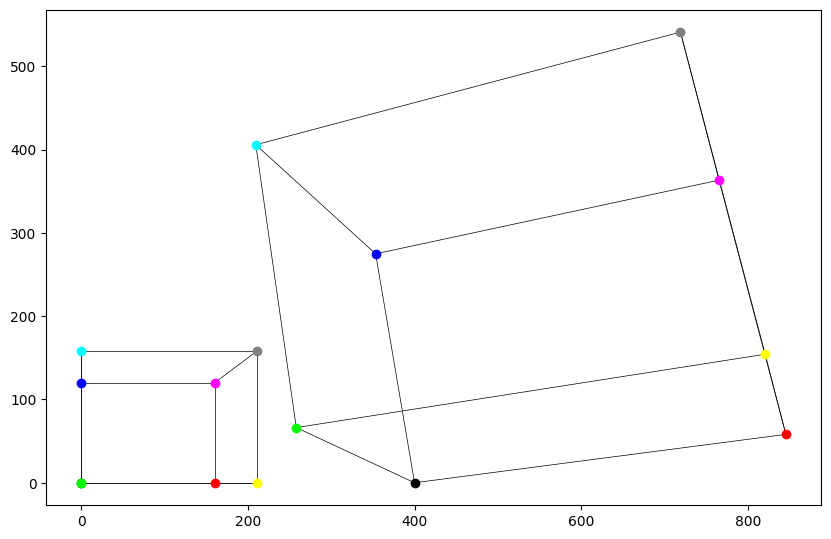

In [91]:
# Set the origin of the camera to be at (0, -5, 0)
"""
ranslation_matrix_cam1 = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, -5],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])
# Rotate the camera such that its z-axis points in the direction of the world x-axis 
# rotate 90 degree along to y-axis
rotation_angle_y = np.radians([90])[0]

rotation_matrix_y = np.array([[np.cos(rotation_angle_y), 0, np.sin(rotation_angle_y), 0],
                              [0, 1, 0, 0],
                              [-np.sin(rotation_angle_y), 0, np.cos(rotation_angle_y), 0],
                              [0, 0, 0, 1]])
# Compute world to camera1 matrix 
k1Hw = matmul(rotation_matrix_y, translation_matrix_cam1)
"""

theta = np.pi / 2  # 90 degrees

# Define the cosine and sine of the rotation angle
cos_theta = np.cos(theta)
sin_theta = np.sin(theta)

# Construct the rotation matrix using cosine and sine
rotation_matrix = np.array([
    [1, 0, 0],
    [0, 0, sin_theta],
    [0, -sin_theta, 0]
])

#rot_cam = matmul(rotation_matrix, camera_o)

new_matrix = np.zeros((4, 4))

# Copy the original 3x3 matrix to the top-left corner of the new matrix
new_matrix[:3, :3] = rotation_matrix

# Add a 1 in the bottom-right corner
new_matrix[3, 3] = 1
# Compute world to camera1 matrix
k1Hw =  matmul(new_matrix , (data([data([1, 0, 0, 0]), data([0, 1, 0, -5]), data([0 , 0,  1, 0]), data([0, 0, 0, 1])] )))
print(k1Hw)
print(K)
m1 = np.matmul(wC2o, data(cube_vertices).T).T
m2 = np.matmul(wC1o, data(cube_vertices).T).T

# Project everything to the camera and plot it
C1_projected_vertices = [
    pi(matmul(K, pi(matmul(k1Hw, Xo)))) for Xo in m1
 ]
print(C1_projected_vertices)

C2_projected_vertices = [
    pi(matmul(K, pi(matmul(k1Hw, Xo)))) for Xo in m2
     #pi(np.matmul(k1Hw, Xo)) for Xo in m2
]
print(C2_projected_vertices)
f = plt.figure(figsize=(10, 10))
# plt.xlim([0, w])
# plt.ylim([0, h])
draw_cube(C1_projected_vertices)
draw_cube(C2_projected_vertices)

## Q4 Unproject a point to world coordinates from different depth values

[[ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0. -1.  0.  5.]
 [ 0.  0.  0.  1.]]
[array([0.01875   , 4.9       , 0.01666667, 1.        ]), array([ 1.125, -1.   ,  1.   ,  1.   ]), array([ 1.5       , -3.        ,  1.33333337,  1.        ]), array([ 1.875     , -5.        ,  1.66666675,  1.        ]), array([ 2.25, -7.  ,  2.  ,  1.  ]), array([ 2.625     , -9.        ,  2.33333349,  1.        ]), array([  3.        , -11.        ,   2.66666675,   1.        ]), array([  3.375, -13.   ,   3.   ,   1.   ]), array([  3.75      , -15.        ,   3.33333349,   1.        ])]
projected_point: [299.99997765 200.00000745]
projected_point: [300. 200.]
projected_point: [300.         200.00000596]
projected_point: [300.         200.00000954]
projected_point: [300. 200.]
projected_point: [300.         200.00001362]
projected_point: [300.         200.00000596]
projected_point: [300. 200.]
projected_point: [300.         200.00000954]


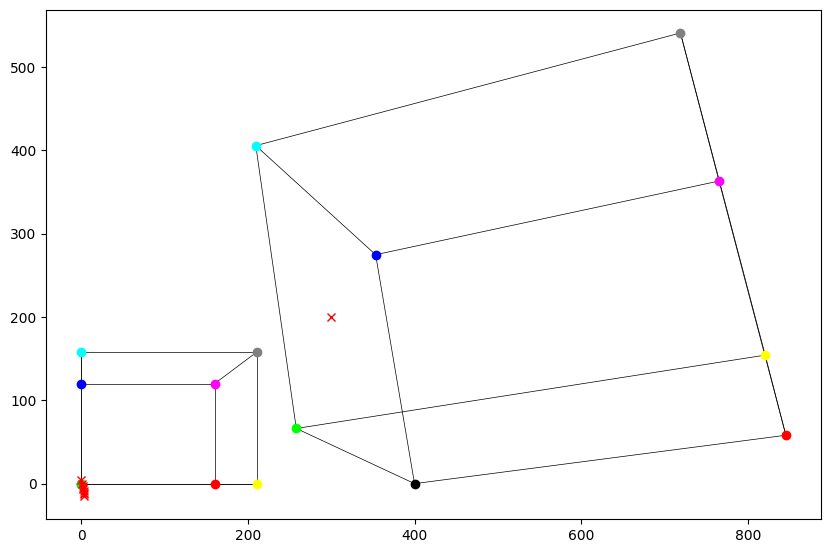

In [92]:

from numpy.linalg import inv
xs = 300 # Sensor x coordinate
ys = 200 # Sensor y coordinate
depths = [0.1, 6, 8, 10, 12, 14, 16, 18, 20] # Depths to unproject
unprojected_points = [] # List of unprojected points to be filled in

# Plot point in camera
f = plt.figure(figsize=(10,10))
#plt.xlim([0, w])
#plt.ylim([0, h])
draw_cube(C1_projected_vertices)
draw_cube(C2_projected_vertices)
plt.plot(xs, ys, 'rx')
print(k1Hw)

# Unproject points
# ...

unprojected_points = [matmul(inv(k1Hw), pi_inv(matmul(inv(K), d* pi_inv(data([xs,ys]))))) for d in depths]
# Draw scene from top

print(unprojected_points
      )


#f = plt.figure(figsize=(5, 15))
#draw_cube(C1_projected_vertices)
#draw_cube(C2_projected_vertices)

# Draw unprojected points
plt.plot([p[0] for p in unprojected_points], [p[1] for p in unprojected_points], 'rx-')

# Reproject points to check if they match the original sensor coordinates
projected_points = [
   pi(matmul(K, pi(matmul(k1Hw, Xo)))) for Xo in unprojected_points
 ]
for p in projected_points:
    print('projected_point:', p)

## Q5 Do the projection with a 3x4 matrix P instead

P: [[1600.    0.    0.    0.]
 [   0.    0. 1200.    0.]
 [   0.   -1.    0.    5.]]


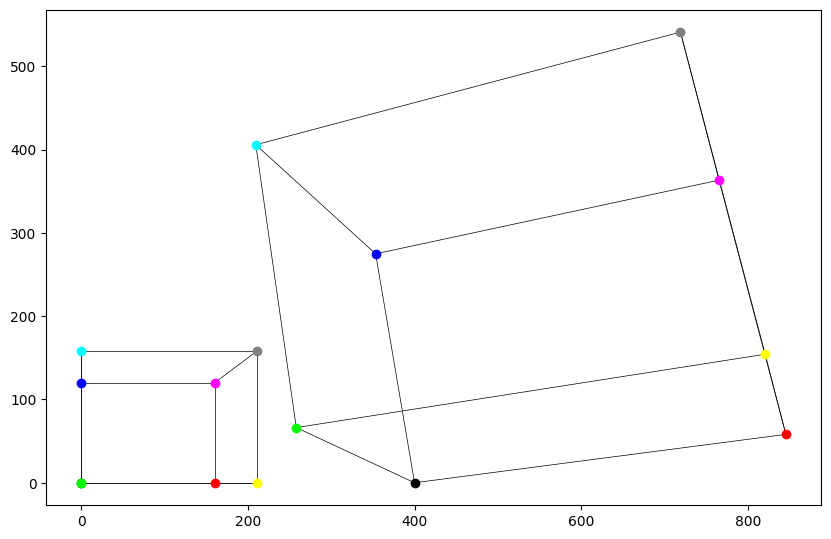

In [93]:
# Use matrix P 

P = np.zeros((3, 4), dtype=np.float32)
f = 5

P = matmul(K, k1Hw[:3, :])

# Print matrix
np.set_printoptions(suppress=True)
print('P:', P)

# Render scene to camera 1 using matrix P 
C1_projected_vertices = [
    pi(np.matmul(P, Xo)) for Xo in m1
]

C2_projected_vertices = [
    pi(np.matmul(P, Xo)) for Xo in m2
]

f = plt.figure(figsize=(10, 10))
# plt.xlim([0, w])
# plt.ylim([0, h])
draw_cube(C1_projected_vertices)
draw_cube(C2_projected_vertices)

## Q6 Define camera 2 from given cooridnate system axes

[array([-3851.74052735,  2620.59910393]), array([-3589.70290242,  1829.57082935]), array([-3965.33481494,  1775.25818518]), array([-4402.59642163,  2772.16390802]), array([-2398.63685055,  1843.6857423 ]), array([-2393.17778133,  1352.35178983]), array([-2473.72593923,  1239.26293824]), array([-2494.63566809,  1800.71591021])]


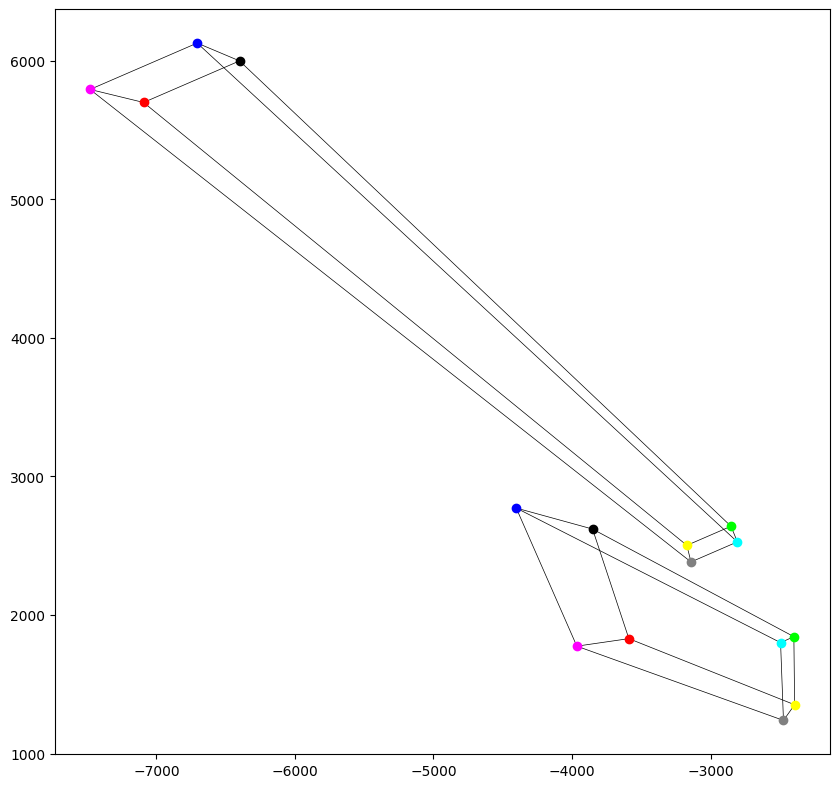

In [100]:
# Camera 2 parameters: 
# Origin in world coordinates: [4, -5, -1]
# Direction of x-axis in world coordinates: [0.8660254, 0.5, 0]
# Direction of y-axis in world coordinates: [-0.10395585, 0.18005681, -0.9781476]
# Direction of z-axis in world coordinates: [-0.4890738, 0.8471007, 0.20791167]
origin_C2 = np.array([4, -5, -1])
x_axis_C2 = np.array([0.8660254, 0.5, 0])
y_axis_C2 = np.array([-0.10395585, 0.18005681, -0.9781476])
z_axis_C2 = np.array([-0.4890738, 0.8471007, 0.20791167])

rotation_matrix_C2 = np.column_stack((x_axis_C2, y_axis_C2, z_axis_C2))
T_C2 = np.array([origin_C2]).T
k2Hw = np.block([
    [rotation_matrix_C2, T_C2],
    [0, 0, 0, 1]
])

C1_projected_vertices = [
    pi(matmul(K, pi(matmul(k2Hw, Xo)))) for Xo in m1
 ]
print(C1_projected_vertices)

C2_projected_vertices = [
    pi(matmul(K, pi(matmul(k2Hw, Xo)))) for Xo in m2
]

f = plt.figure(figsize=(10, 10))
# plt.xlim([0, w])
# plt.ylim([0, h])
draw_cube(C1_projected_vertices)
draw_cube(C2_projected_vertices)

## Reproject points from Q5 to camera2 

[ 3.49870308 -4.09422829 -5.78945804]
[ 4.58916062 -3.77045611  0.18605927]
[ 4.95880723 -3.6607028   2.21165837]
[ 5.32845384 -3.55094948  4.23725747]
[ 5.6981005  -3.44119627  6.26285654]
[ 6.06774705 -3.33144286  8.28845566]
[ 6.43739371 -3.22168964 10.31405474]
[ 6.80704037 -3.11193643 12.33965381]
[ 7.17668692 -3.00218302 14.36525293]


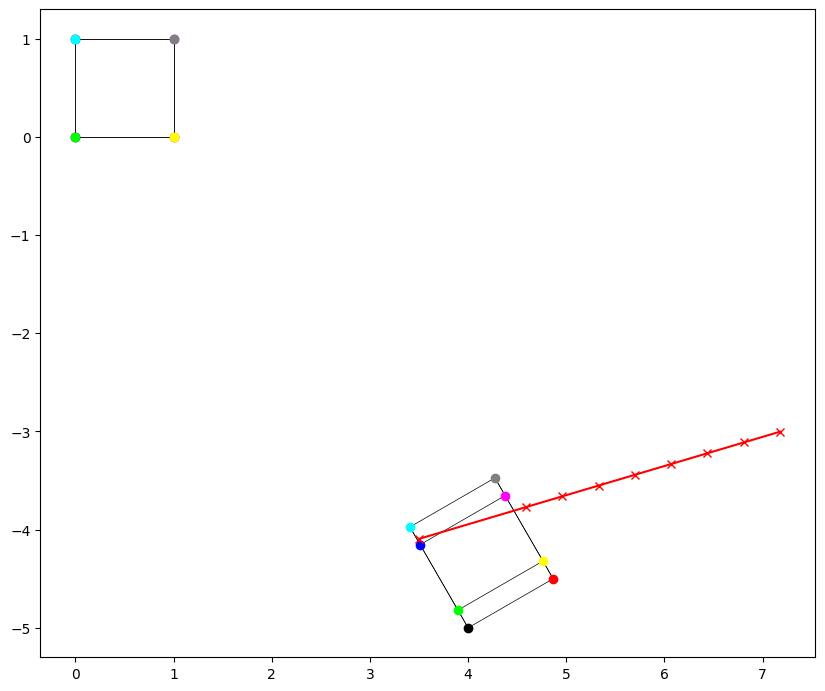

In [103]:
# Reproject points

C1_projected_vertices = [
    pi(np.matmul(k1Hw, Xo)) for Xo in cube_vertices
]

C2_projected_vertices = [
    pi(np.matmul(k2Hw, Xo)) for Xo in cube_vertices
]

projected_points = [
    pi(np.matmul(k2Hw, Xo)) for Xo in unprojected_points
]

# Render scene 
f = plt.figure(figsize=(10, 10))
# plt.xlim([0, w])
# plt.ylim([0, h])
draw_cube(C1_projected_vertices)
draw_cube(C2_projected_vertices)

# Draw unprojected points
for p in projected_points: 
    print(p)

plt.plot([p[0] for p in projected_points], [p[1] for p in projected_points], 'rx-')        